<a href="https://colab.research.google.com/github/kamaleshpantra/Understanding-Classrooms-Through-Social-Network-Data-Analysis/blob/main/classroom_SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

random.seed(42)

n_students = 187

labs = ['Lab_' + str(i) for i in range(1, 9)]

genders = ['Male', 'Female']

exam1_scores = [random.randint(50, 100) for _ in range(n_students)]
exam2_scores = [random.randint(50, 100) for _ in range(n_students)]
exam3_scores = [random.randint(50, 100) for _ in range(n_students)]

def calculate_final_grade(exam1, exam2, exam3, weights=[0.3, 0.3, 0.4]):
    return round(exam1 * weights[0] + exam2 * weights[1] + exam3 * weights[2], 2)

final_grades = [calculate_final_grade(exam1_scores[i], exam2_scores[i], exam3_scores[i]) for i in range(n_students)]

student_data = {
    'Student': ['Student_' + str(i) for i in range(1, n_students + 1)],
    'Lab': [random.choice(labs) for _ in range(n_students)],
    'Gender': [random.choice(genders) for _ in range(n_students)],
    'Exam1_Score': exam1_scores,
    'Exam2_Score': exam2_scores,
    'Exam3_Score': exam3_scores,
    'Final_Grade': final_grades
}

student_df = pd.DataFrame(student_data)
student_df.head()

,Student,Lab,Gender,Exam1_Score,Exam2_Score,Exam3_Score,Final_Grade
0,Student_1,Lab_2,Male,90,61,88,80.5
1,Student_2,Lab_7,Male,57,82,54,63.3
2,Student_3,Lab_6,Male,51,56,93,69.3
3,Student_4,Lab_6,Female,97,90,65,82.1
4,Student_5,Lab_7,Male,67,69,75,70.8


In [ ]:

import random
import pandas as pd

def generate_study_pairs(students, num_pairs, existing_pairs=set()):
    pairs = set(existing_pairs)
    new_values = []
    all_values = list(random.randint(1, 10) for _ in range(len(existing_pairs)))

    while len(pairs) < num_pairs:
        pair = tuple(sorted(random.sample(students, 2)))
        if pair not in pairs:
            pairs.add(pair)
            new_values.append(random.randint(1, 10))
    all_values.extend(new_values)
    return list(pairs), all_values

students = student_df['Student'].tolist()
study_pairs_exam1, hours_studied_exam1 = generate_study_pairs(students, 150)

study_pairs_exam2, hours_studied_exam2 = generate_study_pairs(students, 181, existing_pairs=set(study_pairs_exam1))

all_existing_pairs = set(study_pairs_exam1) | set(study_pairs_exam2)
study_pairs_exam3, hours_studied_exam3 = generate_study_pairs(students, 200, existing_pairs=all_existing_pairs)

study_df_exam1 = pd.DataFrame(study_pairs_exam1, columns=['Student1', 'Student2'])
study_df_exam1['Hours_Studied'] = hours_studied_exam1

study_df_exam2 = pd.DataFrame(study_pairs_exam2, columns=['Student1', 'Student2'])
study_df_exam2['Hours_Studied'] = hours_studied_exam2

study_df_exam3 = pd.DataFrame(study_pairs_exam3, columns=['Student1', 'Student2'])
study_df_exam3['Hours_Studied'] = hours_studied_exam3

print("Study Pairs for Exam 1:")
print(study_df_exam1.head())
print("Study Pairs for Exam 2 (includes Exam 1 pairs):")
print(study_df_exam2.head())
print("Study Pairs for Exam 3 (includes Exam 1 and 2 pairs):")
print(study_df_exam3.head())


Study Pairs for Exam 1:
      Student1     Student2  Hours_Studied
0  Student_150  Student_163              8
1   Student_23   Student_81             10
2  Student_148   Student_92              8
3  Student_121   Student_24              6
4  Student_114   Student_43              6
Study Pairs for Exam 2 (includes Exam 1 pairs):
      Student1     Student2  Hours_Studied
0  Student_104  Student_147             10
1  Student_150  Student_163              9
2   Student_23   Student_81              5
3  Student_148   Student_92              8
4  Student_121   Student_24              9
Study Pairs for Exam 3 (includes Exam 1 and 2 pairs):
      Student1     Student2  Hours_Studied
0  Student_104  Student_147             10
1  Student_150  Student_163             10
2   Student_23   Student_81              9
3  Student_148   Student_92              7
4  Student_121   Student_24              8


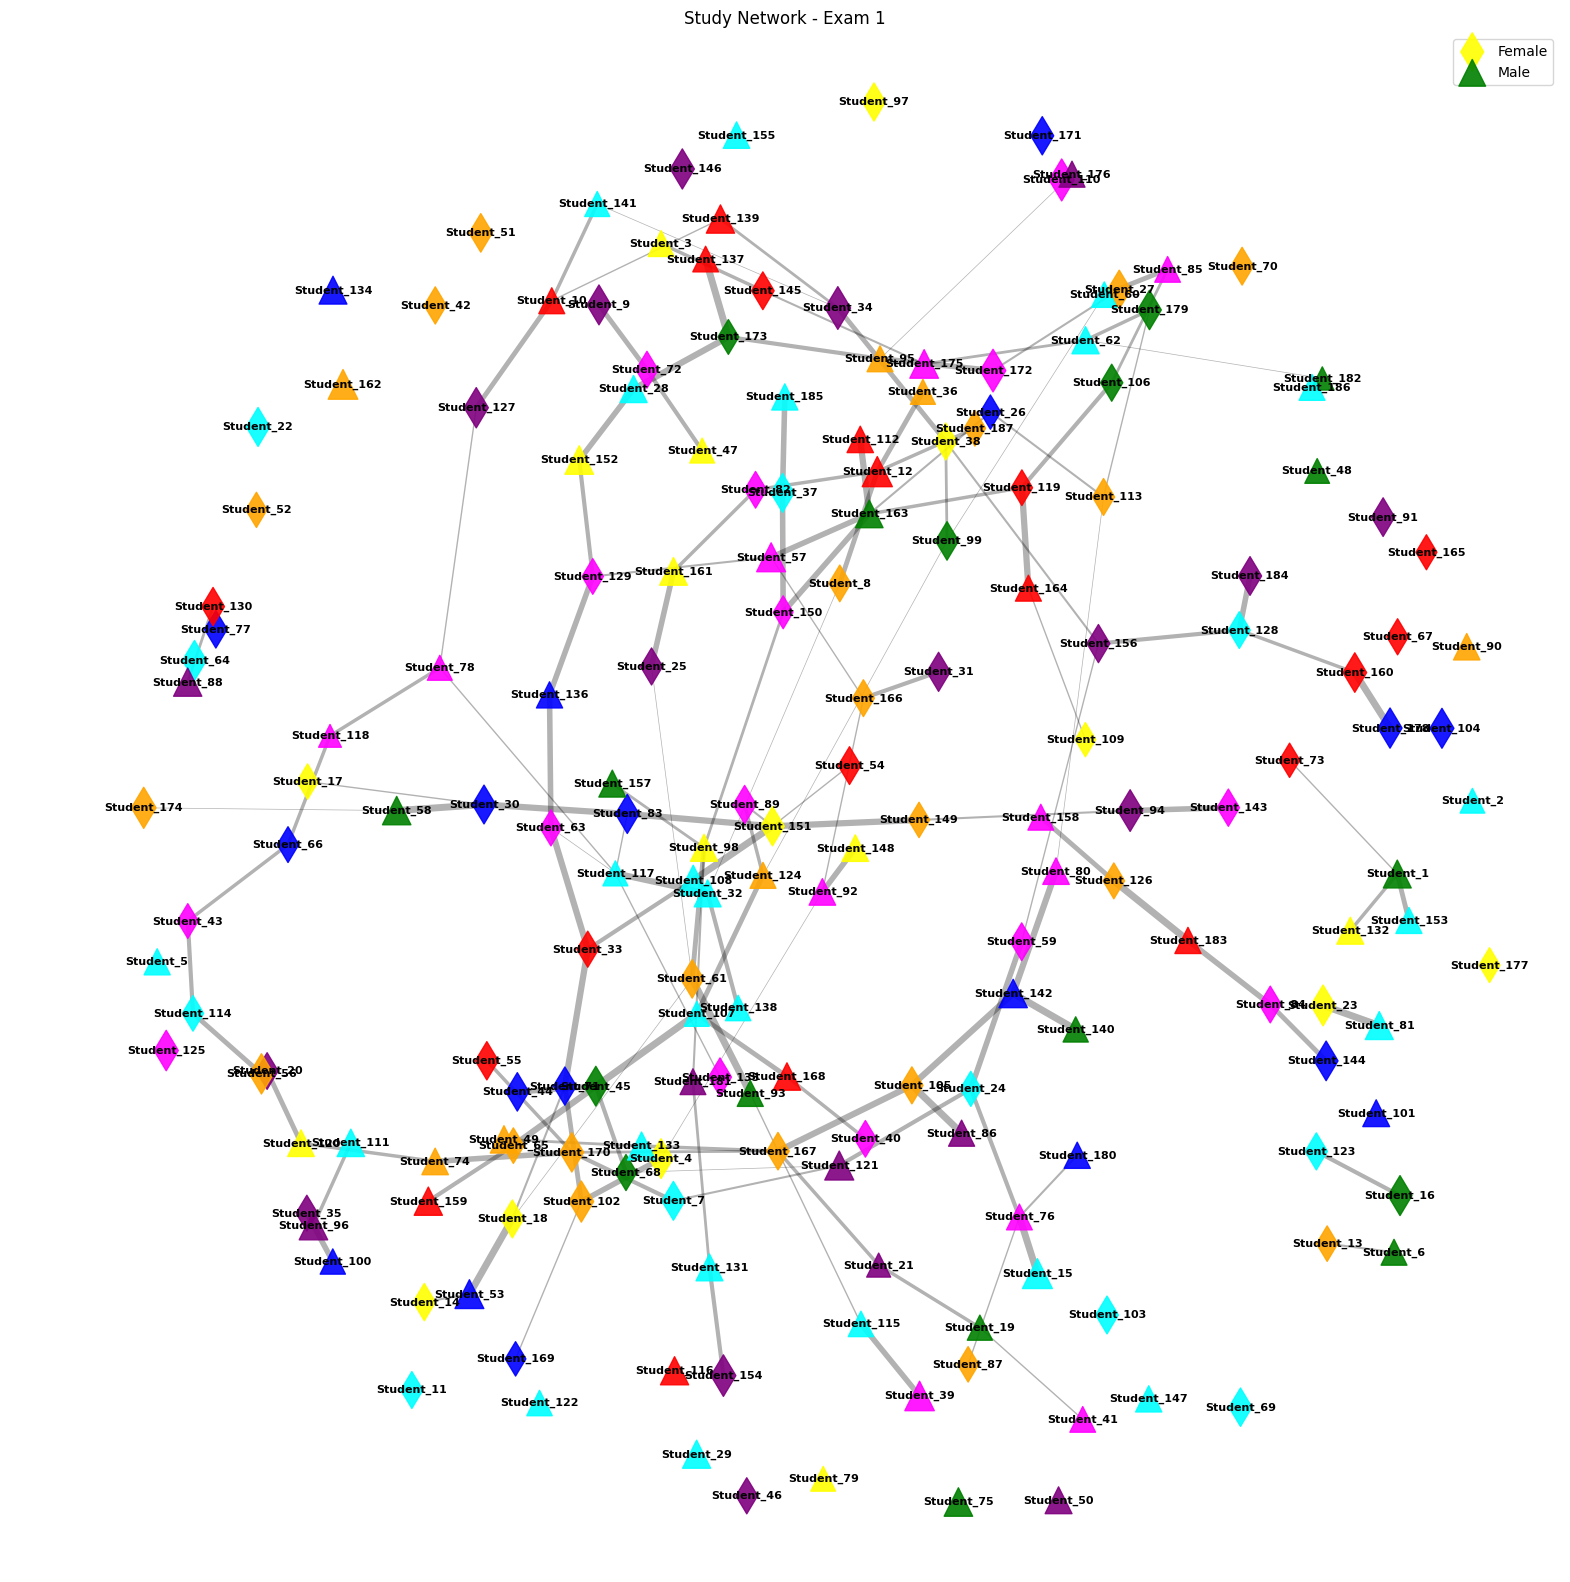

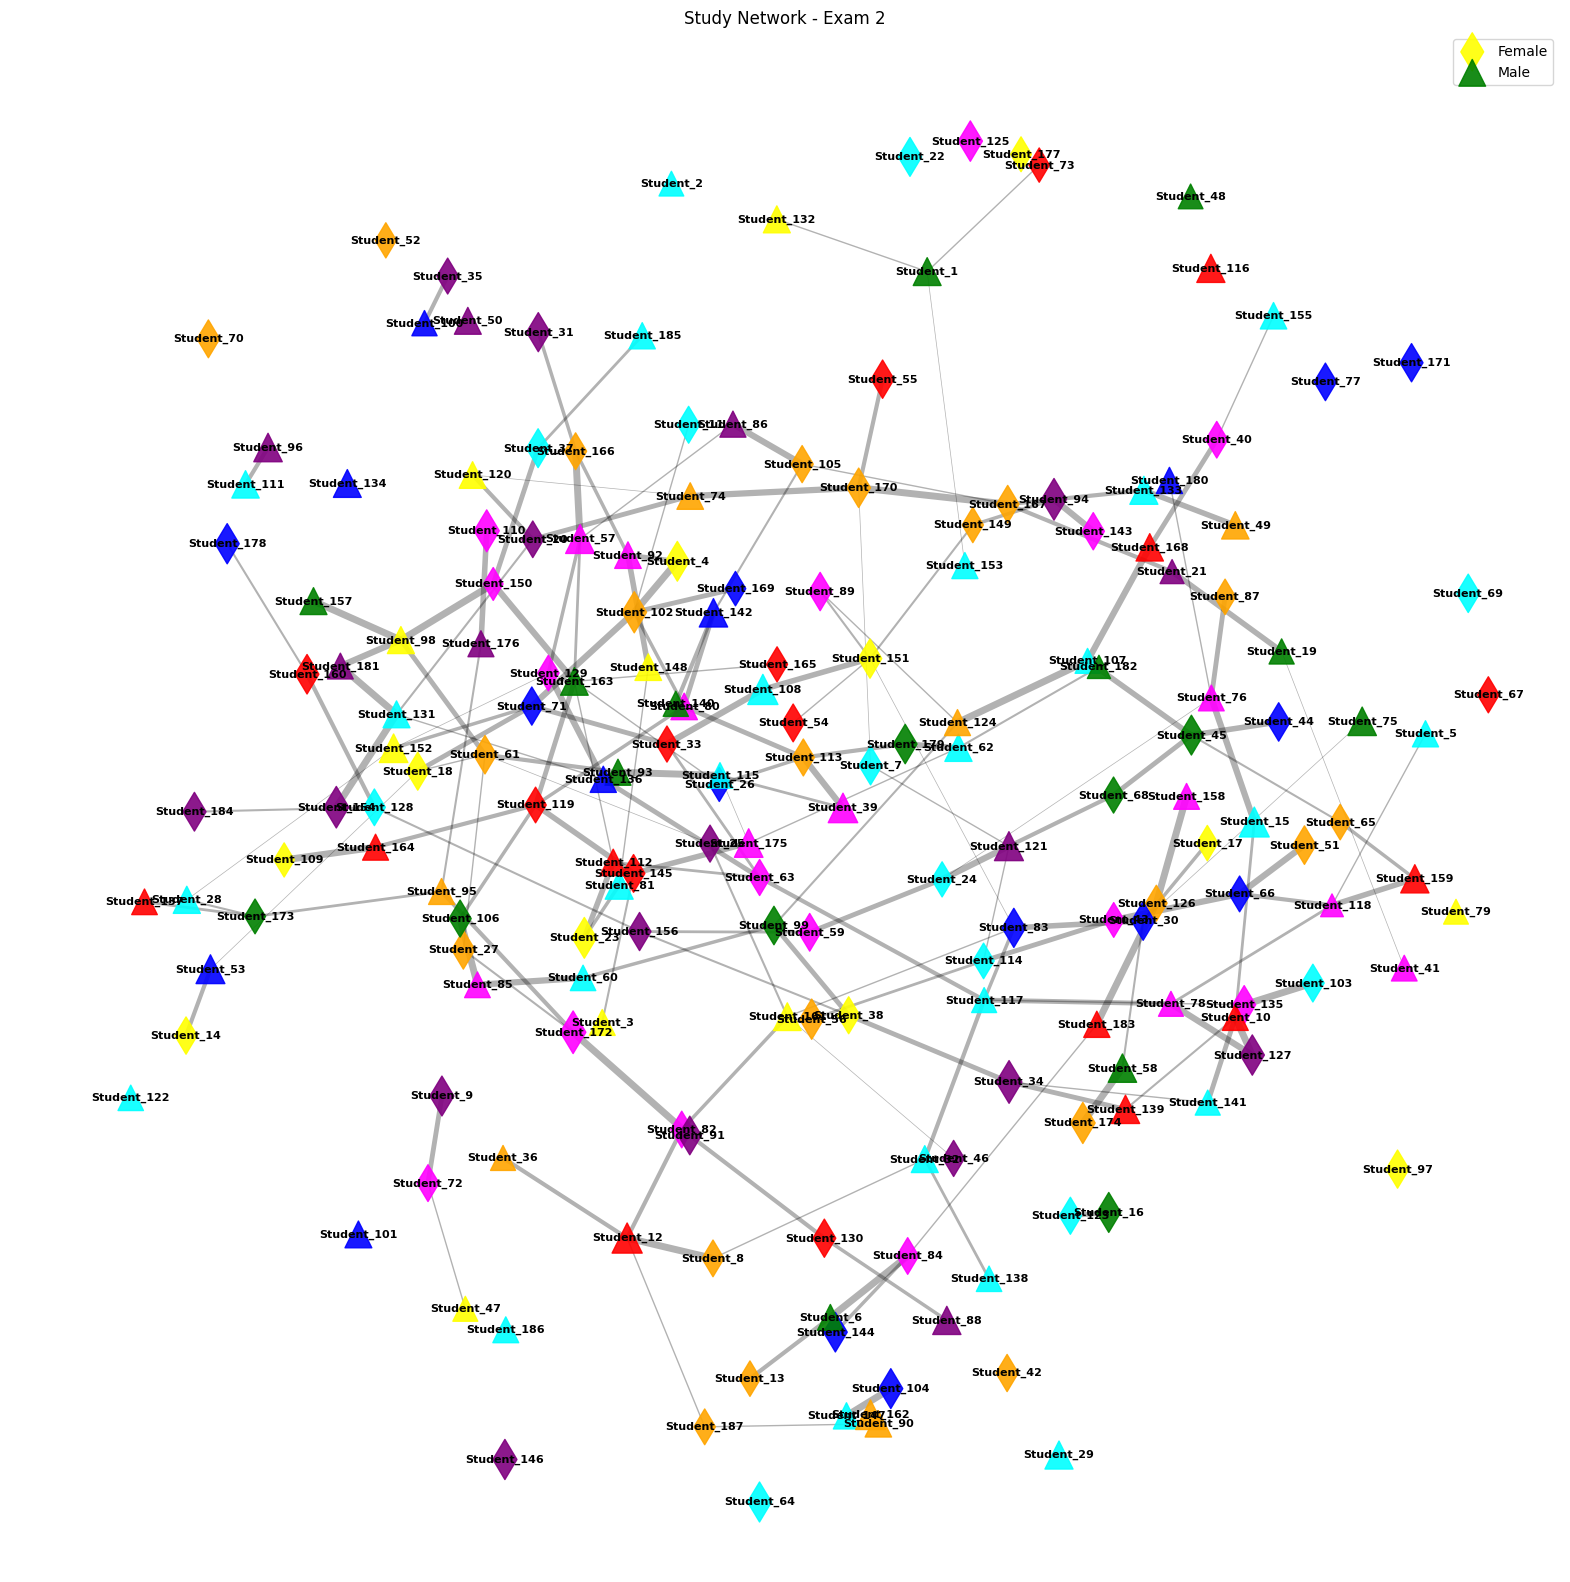

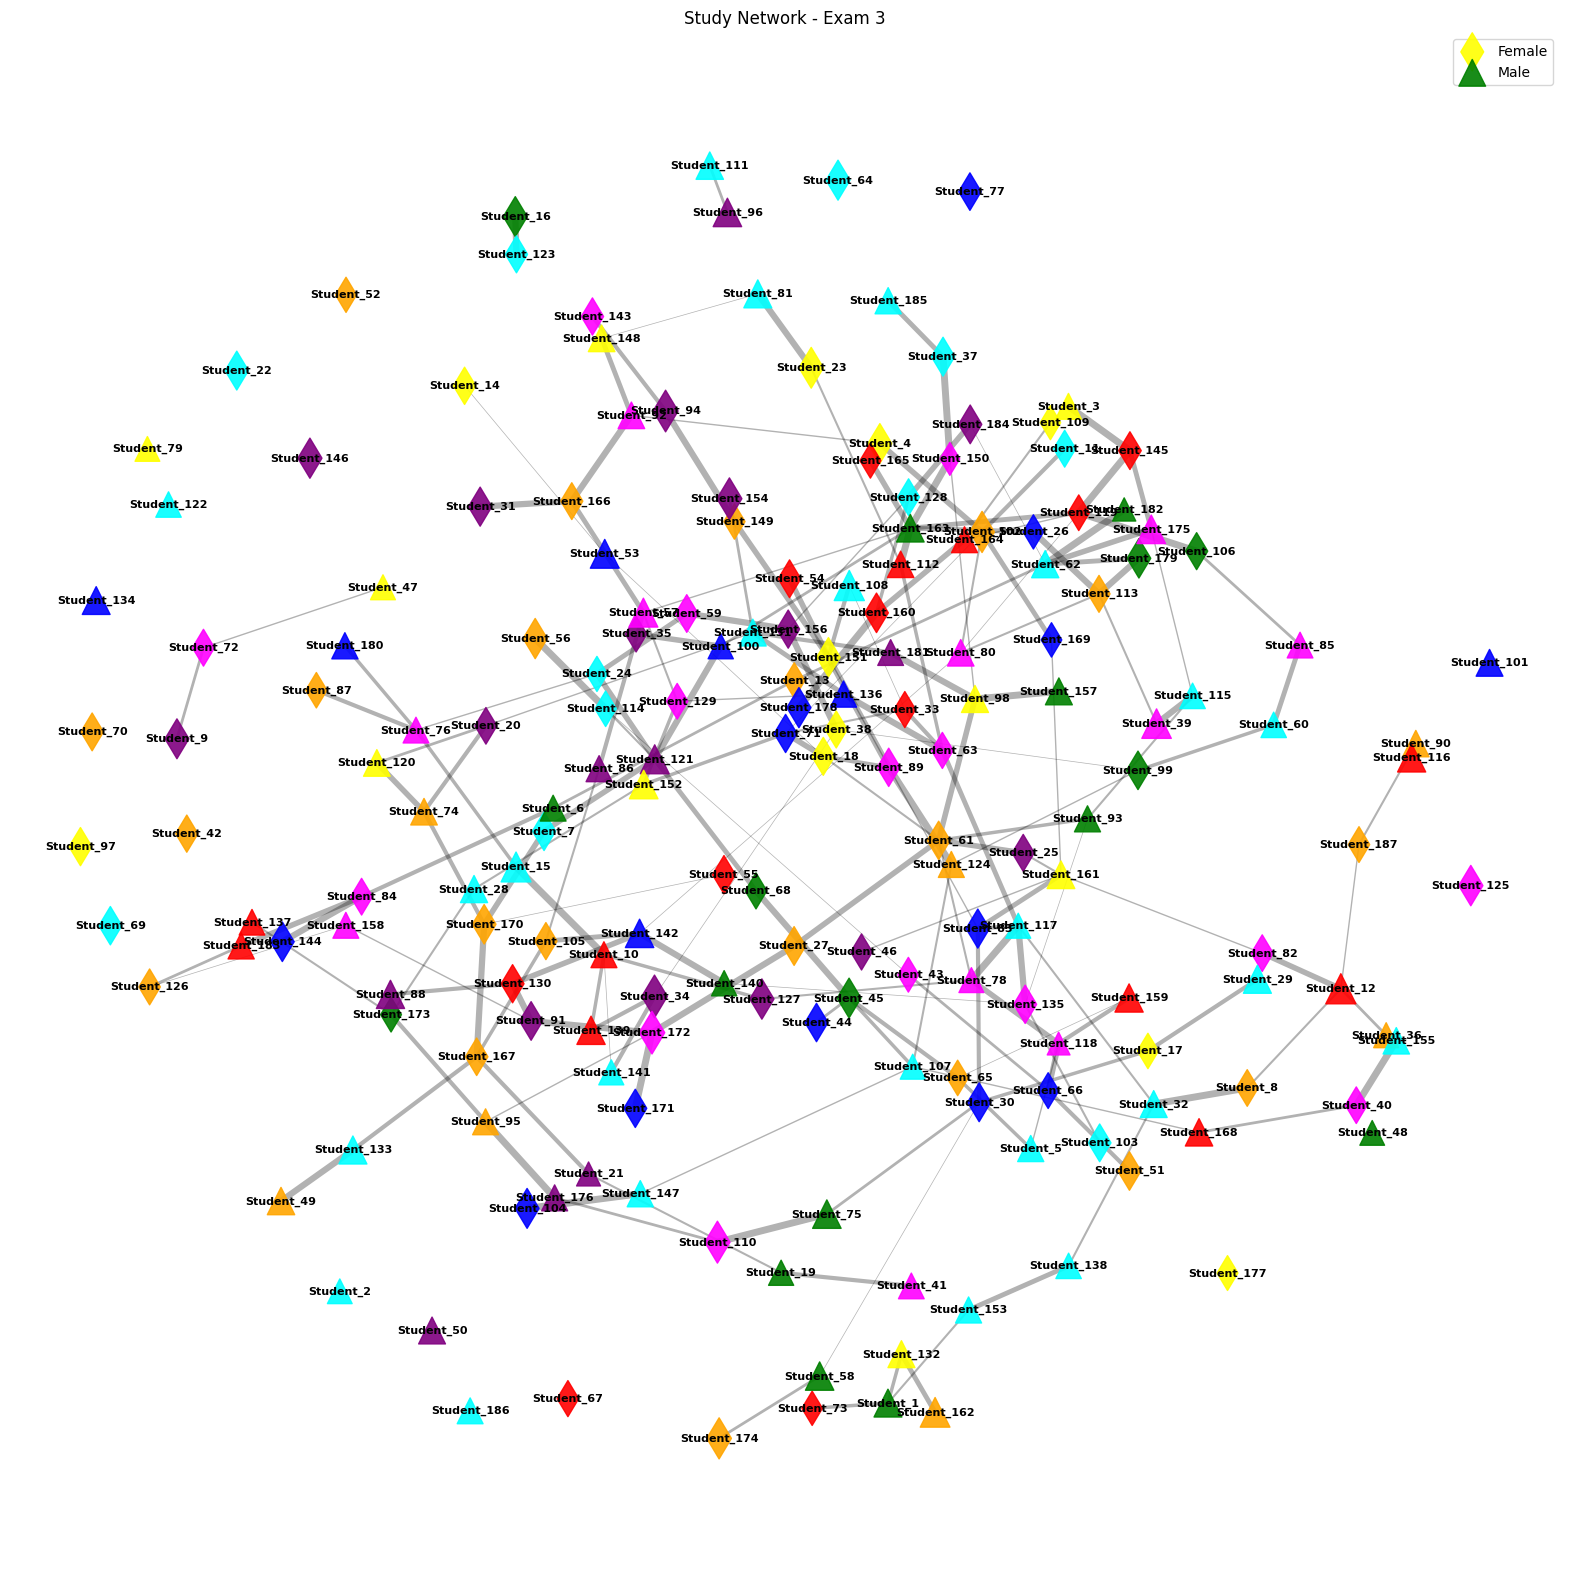

In [ ]:
def build_and_visualize_network(study_pairs_df, student_df, title):
    G = nx.Graph()

    for _, row in student_df.iterrows():
        G.add_node(row['Student'], gender=row['Gender'], lab=row['Lab'], grade=row['Final_Grade'])

    for _, row in study_pairs_df.iterrows():
        G.add_edge(row['Student1'], row['Student2'], weight=row['Hours_Studied'])

    color_map = ['red' if G.nodes[node]['lab'] == 'Lab_1' else
                 'green' if G.nodes[node]['lab'] == 'Lab_2' else
                 'blue' if G.nodes[node]['lab'] == 'Lab_3' else
                 'orange' if G.nodes[node]['lab'] == 'Lab_4' else
                 'purple' if G.nodes[node]['lab'] == 'Lab_5' else
                 'yellow' if G.nodes[node]['lab'] == 'Lab_6' else
                 'cyan' if G.nodes[node]['lab'] == 'Lab_7' else
                 'magenta' for node in G]

    node_sizes = [G.nodes[node]['grade'] * 5 for node in G]
    edge_widths = [max(0.5, G[u][v]['weight'] * 0.5) for u, v in G.edges()]

    pos = nx.spring_layout(G, k=0.3, iterations=50)

    female_nodes = [node for node, attr in G.nodes(data=True) if attr['gender'] == 'Female']
    male_nodes = [node for node, attr in G.nodes(data=True) if attr['gender'] == 'Male']

    plt.figure(figsize=(20, 20))

    # Diamond shape for female nodes

    nx.draw_networkx_nodes(G, pos, nodelist=female_nodes, node_shape='d',
                           node_color=[color_map[i] for i, node in enumerate(G) if node in female_nodes],
                           node_size=[node_sizes[i] for i, node in enumerate(G) if node in female_nodes], alpha=0.9, label="Female")

    nx.draw_networkx_nodes(G, pos, nodelist=male_nodes, node_shape='^',
                           node_color=[color_map[i] for i, node in enumerate(G) if node in male_nodes],
                           node_size=[node_sizes[i] for i, node in enumerate(G) if node in male_nodes], alpha=0.9, label="Male")

    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
    plt.legend(scatterpoints=1)
    plt.title(title)
    plt.axis('off')
    plt.show()

    return G

G_exam1 = build_and_visualize_network(study_df_exam1, student_df, 'Study Network - Exam 1')
G_exam2 = build_and_visualize_network(study_df_exam2, student_df, 'Study Network - Exam 2')
G_exam3 = build_and_visualize_network(study_df_exam3, student_df, 'Study Network - Exam 3')


In [ ]:
help(nx.drawing.layout)

Help on module networkx.drawing.layout in networkx.drawing:

NAME
    networkx.drawing.layout

DESCRIPTION
    ******
    Layout
    ******
    
    Node positioning algorithms for graph drawing.
    
    For `random_layout()` the possible resulting shape
    is a square of side [0, scale] (default: [0, 1])
    Changing `center` shifts the layout by that amount.
    
    For the other layout routines, the extent is
    [center - scale, center + scale] (default: [-1, 1]).
    

FUNCTIONS
    arf_layout(G, pos=None, scaling=1, a=1.1, etol=1e-06, dt=0.001, max_iter=1000, *, seed=None)
        Arf layout for networkx
        
        The attractive and repulsive forces (arf) layout [1]
        improves the spring layout in three ways. First, it
        prevents congestion of highly connected nodes due to
        strong forcing between nodes. Second, it utilizes the
        layout space more effectively by preventing large gaps
        that spring layout tends to create. Lastly, the arf
   

In [ ]:
from itertools import combinations

triad_class_1 = {}
for nodes in combinations(G_exam1.nodes, 3):
    n_edges = G_exam1.subgraph(nodes).number_of_edges()
    triad_class_1.setdefault(n_edges, []).append(nodes)

triad_class_2 = {}
for nodes in combinations(G_exam2.nodes, 3):
    n_edges = G_exam2.subgraph(nodes).number_of_edges()
    triad_class_2.setdefault(n_edges, []).append(nodes)

triad_class_3 = {}
for nodes in combinations(G_exam3.nodes, 3):
    n_edges = G_exam3.subgraph(nodes).number_of_edges()
    triad_class_3.setdefault(n_edges, []).append(nodes)

In [ ]:
print(len(triad_class_1[2]))

220


In [ ]:

def network_changes(G,triad):
  print("Number of edges : ",G.number_of_edges())
  print("Density : ",nx.density(G))
  print("Triad(0) : ",len(triad[0]))
  print("Triad(1) : ",len(triad[1]))
  print("Triad(2) : ",len(triad[2]))
  # print("Triad(3) : ",len(triad_class_1[3]))
  print("Transitivity : ",nx.transitivity(G))

print("Exam 1 : ")
network_changes(G_exam1,triad_class_1)
print("Exam 2 : ")
network_changes(G_exam2,triad_class_2)
print("Exam 3 : ")
network_changes(G_exam3,triad_class_3)


In [ ]:
from collections import Counter
def degree_dist(G):
  degrees = [degree for node, degree in G.degree()]

  degree_count = Counter(degrees)
  degree, count = zip(*degree_count.items())

  print("Degree:Nodes")
  for degree, count in sorted(degree_count.items()):
      print(f"{degree}: {count} ",sep=',' , end = '')
  print()

degree_dist(G_exam1)
degree_dist(G_exam2)
degree_dist(G_exam3)

Degree:Nodes
0: 36 1: 57 2: 52 3: 32 4: 7 5: 3 
Degree:Nodes
0: 24 1: 53 2: 52 3: 34 4: 18 5: 5 6: 1 
Degree:Nodes
0: 21 1: 42 2: 57 3: 36 4: 22 5: 7 6: 1 7: 1 


In [ ]:
import numpy as np
from scipy.stats import pearsonr

student_exam_scores_1 = {}
student_exam_scores_2 = {}
student_exam_scores_3 = {}
for index, row in student_df.iterrows():
    student_id = row['Student']
    exam1_score = row['Exam1_Score']
    exam2_score = row['Exam2_Score']
    exam3_score = row['Exam3_Score']
    student_exam_scores_1[student_id] = exam1_score
    student_exam_scores_2[student_id] = exam2_score
    student_exam_scores_3[student_id] = exam3_score

def ties_as_predictors(G, exam_scores, n_permutations=1000):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)

    students = list(G.nodes())
    actual_scores = np.array([exam_scores[student] for student in students])
    degree_values = np.array([degree_centrality[student] for student in students])
    betweenness_values = np.array([betweenness_centrality[student] for student in students])

    # origional correlation
    actual_corr_degree, _ = pearsonr(actual_scores, degree_values)
    actual_corr_betweenness, _ = pearsonr(actual_scores, betweenness_values)

    # Permutation test
    perm_corrs_degree = []
    perm_corrs_betweenness = []
    for _ in range(n_permutations):
        np.random.shuffle(actual_scores)
        perm_corr_degree, _ = pearsonr(actual_scores, degree_values)
        perm_corr_betweenness, _ = pearsonr(actual_scores, betweenness_values)

        perm_corrs_degree.append(perm_corr_degree)
        perm_corrs_betweenness.append(perm_corr_betweenness)

    p_value_degree = np.sum(np.array(perm_corrs_degree) >= actual_corr_degree) / n_permutations
    p_value_betweenness = np.sum(np.array(perm_corrs_betweenness) >= actual_corr_betweenness) / n_permutations

    print(f"Actual Degree Correlation: {actual_corr_degree}, p-value: {p_value_degree}")
    print(f"Actual Betweenness Correlation: {actual_corr_betweenness}, p-value: {p_value_betweenness}")
print("Exan 1 : ")
ties_as_predictors(G_exam1,student_exam_scores_1)
print("Exan 2 : ")
ties_as_predictors(G_exam2,student_exam_scores_2)
print("Exan 3 : ")
ties_as_predictors(G_exam3,student_exam_scores_3)

Exan 1 : 
Actual Degree Correlation: -0.02070659890100785, p-value: 0.638
Actual Betweenness Correlation: -0.08730753965776263, p-value: 0.893
Exan 2 : 
Actual Degree Correlation: 0.012615345645715866, p-value: 0.426
Actual Betweenness Correlation: 0.0057370591159003285, p-value: 0.455
Exan 3 : 
Actual Degree Correlation: 0.08135108198045732, p-value: 0.136
Actual Betweenness Correlation: 0.06177482451315265, p-value: 0.204


In [ ]:
import pandas as pd
import plotly.express as px

exam1_partners = {student: len(list(G_exam1.neighbors(student))) for student in G_exam1.nodes()}
exam2_partners = {student: len(list(G_exam2.neighbors(student))) for student in G_exam2.nodes()}
exam3_partners = {student: len(list(G_exam3.neighbors(student))) for student in G_exam3.nodes()}

data = {
    "Student": list(G_exam1.nodes()),
    "Exam 1 Study Partners": list(exam1_partners.values()),
    "Exam 2 Study Partners": list(exam2_partners.values()),
    "Exam 3 Study Partners": list(exam3_partners.values()),
}

df = pd.DataFrame(data)

fig = px.parallel_categories(
    df,
    dimensions=["Exam 1 Study Partners", "Exam 2 Study Partners", "Exam 3 Study Partners"],  # Include Exam 3
    color="Exam 1 Study Partners",
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={"Exam 1 Study Partners": "Exam 1", "Exam 2 Study Partners": "Exam 2", "Exam 3 Study Partners": "Exam 3"}, # Custom labels

)

fig.update_layout(
    title="Parallel Coordinate Plot of Study Partners Changes Between Exams",
    height=500,
)

fig.show()

In [ ]:
def calculate_homophily(G, attribute):
    same_attribute_ties = 0
    total_ties = 0
    for (node1, node2) in G.edges():
        if G.nodes[node1][attribute] == G.nodes[node2][attribute]:
            same_attribute_ties += 1
        total_ties += 1
    if total_ties > 0:
      homophily = same_attribute_ties / total_ties
    else :
      homophily = 0
    return homophily
#By lab
homophily_exam1_lab = calculate_homophily(G_exam1, 'lab')

homophily_exam2_lab = calculate_homophily(G_exam2, 'lab')

homophily_exam3_lab = calculate_homophily(G_exam3, 'lab')

print("\nExam 1 Homophily (Lab):", homophily_exam1_lab)

print("\nExam 2 Homophily (Lab):", homophily_exam2_lab)

print("\nExam 3 Homophily (Lab):", homophily_exam3_lab)

#By gender
homophily_exam1_gender = calculate_homophily(G_exam1, 'gender')

homophily_exam2_gender = calculate_homophily(G_exam2, 'gender')

homophily_exam3_gender = calculate_homophily(G_exam3, 'gender')

print("\nExam 1 Homophily (Gender):", homophily_exam1_gender)

print("\nExam 2 Homophily (Gender):", homophily_exam2_gender)

print("\nExam 3 Homophily (Gender):", homophily_exam3_gender)



Exam 1 Homophily (Lab): 0.08

Exam 2 Homophily (Lab): 0.08287292817679558

Exam 3 Homophily (Lab): 0.09

Exam 1 Homophily (Gender): 0.5133333333333333

Exam 2 Homophily (Gender): 0.5027624309392266

Exam 3 Homophily (Gender): 0.49


In [ ]:
#Analyze Study Relationships and Performance

# This is to see if students from the same lab are more likely to study together
def analyze_lab_relationships(study_pairs_df, student_df):
    lab_pairs = study_pairs_df.merge(student_df[['Student', 'Lab']], left_on='Student1', right_on='Student', suffixes=('', '_1'))
    lab_pairs = lab_pairs.merge(student_df[['Student', 'Lab']], left_on='Student2', right_on='Student', suffixes=('', '_2'))

    same_lab_count = lab_pairs[lab_pairs['Lab'] == lab_pairs['Lab_2']].shape[0]
    total_count = lab_pairs.shape[0]

    if total_count > 0:
      probability_same_lab = same_lab_count / total_count
    else :
      probability_same_lab = 0
    print(f"Probability of studying with someone from the same lab: {probability_same_lab:.4f}")

print("\nAnalyzing Study Relationships by Lab:")
analyze_lab_relationships(study_df_exam1, student_df)
analyze_lab_relationships(study_df_exam2, student_df)
analyze_lab_relationships(study_df_exam3, student_df)

# This is for checking whether the marks of a student is infuenced by number of study partners (we use correlation coefficient to check)
def analyze_performance_by_partners(study_pairs_df, student_df):
    partner_count = student_df['Student'].map(lambda student: study_pairs_df[study_pairs_df['Student1'] == student].shape[0] +
                                                            study_pairs_df[study_pairs_df['Student2'] == student].shape[0])
    student_df['Partner_Count'] = partner_count
    correlation = student_df[['Final_Grade', 'Partner_Count']].corr().iloc[0, 1]
    print(f"Correlation between number of study partners and final grade: {correlation:.4f}")

print("\nAnalyzing Performance by Number of Study Partners:")
analyze_performance_by_partners(study_df_exam1, student_df)
analyze_performance_by_partners(study_df_exam2, student_df)
analyze_performance_by_partners(study_df_exam3, student_df)


Analyzing Study Relationships by Lab:
Probability of studying with someone from the same lab: 0.0800
Probability of studying with someone from the same lab: 0.0829
Probability of studying with someone from the same lab: 0.0900

Analyzing Performance by Number of Study Partners:
Correlation between number of study partners and final grade: 0.0222
Correlation between number of study partners and final grade: 0.0496
Correlation between number of study partners and final grade: 0.0603
